1 - Importação das bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2 - Leitura dos dados de estrela Red Giant, White Dwarf e Quasar

In [ ]:
dataset1 = pd.read_excel('/content/drive/My Drive//TrabalhoFinal_ICAP2020/SDSS_stars4.xlsx')
dataset2 = pd.read_excel('/content/drive/My Drive//TrabalhoFinal_ICAP2020/SDSS_QSO2.xlsx')

3 - Exclusão de colunas desnecessárias dos datasets

In [ ]:
dataset1 = dataset1.drop(['ra','dec'], axis=1)
dataset2 = dataset2.drop(['SDSS','z','sig_u_mag','sig_g_mag','sig_r_mag','sig_i_mag',
                        'sig_z_mag','FIRST','ROSAT','Mp'], axis=1)

4 - Verificação dos tipos de dados 

In [ ]:
print(dataset1.dtypes)
print(dataset2.dtypes)

u_mag    float64
g_mag    float64
r_mag    float64
i_mag    float64
z_mag    float64
class     object
dtype: object
u_mag    float64
g_mag    float64
r_mag    float64
i_mag    float64
z_mag    float64
class     object
dtype: object


5 - Filtrar do dataset1 5.000 linhas de Red Giant e 5.000 White Dwarf 



In [ ]:
#dataset1 = dataset1.loc[0:3999]
dataset1

,u_mag,g_mag,r_mag,i_mag,z_mag,class
0,205332.00,179680.0,168273.00,163731.00,160911.00,3_RedGiantMainSequence
1,188945.00,176746.0,172089.00,170335.00,16973.00,3_RedGiantMainSequence
2,182909.00,170226.0,166255.00,164313.00,163997.00,3_RedGiantMainSequence
3,197842.00,178207.0,170032.00,167213.00,165416.00,3_RedGiantMainSequence
4,188746.00,176386.0,171206.00,169080.00,168496.00,3_RedGiantMainSequence
...,...,...,...,...,...,...
10213,18543.00,18289.0,18561.00,18.79,18994.00,2_WhiteDwarf
10214,18192.00,18039.0,18374.00,18624.00,18906.00,2_WhiteDwarf
10215,18217.00,17648.0,17427.00,17381.00,17427.00,2_WhiteDwarf
10216,17676.00,17968.0,18.43,18724.00,19.02,2_WhiteDwarf


6 - Filtrar do dataset2 5.000 Quasar

In [ ]:
dataset2 = dataset2.loc[0:4999]
dataset2

,u_mag,g_mag,r_mag,i_mag,z_mag,class
0,20389.0,20468.0,20332.0,20099.0,20053.0,1_Quasar
1,20233.0,20200.0,19945.0,19491.0,19191.0,1_Quasar
2,19921.0,19811.0,19386.0,19165.0,19323.0,1_Quasar
3,19218.0,18893.0,18445.0,18331.0,18110.0,1_Quasar
4,19249.0,19029.0,18980.0,18791.0,18751.0,1_Quasar
...,...,...,...,...,...,...
4995,20026.0,19907.0,19683.0,19492.0,19568.0,1_Quasar
4996,20877.0,20337.0,20239.0,20149.0,19919.0,1_Quasar
4997,22229.0,21283.0,20348.0,19876.0,19380.0,1_Quasar
4998,18994.0,18969.0,18899.0,18610.0,18531.0,1_Quasar


7 - Junção dos 2 datasets

In [ ]:
dataset_merge = pd.concat([dataset1,dataset2])
dataset_merge

,u_mag,g_mag,r_mag,i_mag,z_mag,class
0,205332.0,179680.0,168273.0,163731.0,160911.0,3_RedGiantMainSequence
1,188945.0,176746.0,172089.0,170335.0,16973.0,3_RedGiantMainSequence
2,182909.0,170226.0,166255.0,164313.0,163997.0,3_RedGiantMainSequence
3,197842.0,178207.0,170032.0,167213.0,165416.0,3_RedGiantMainSequence
4,188746.0,176386.0,171206.0,169080.0,168496.0,3_RedGiantMainSequence
...,...,...,...,...,...,...
4995,20026.0,19907.0,19683.0,19492.0,19568.0,1_Quasar
4996,20877.0,20337.0,20239.0,20149.0,19919.0,1_Quasar
4997,22229.0,21283.0,20348.0,19876.0,19380.0,1_Quasar
4998,18994.0,18969.0,18899.0,18610.0,18531.0,1_Quasar


8 - Embaralhar os dados para realizar a separação treino/teste

In [ ]:
from sklearn.utils import shuffle
df = shuffle(dataset_merge)
df

,u_mag,g_mag,r_mag,i_mag,z_mag,class
202,203856.0,178226.0,167382.0,163049.0,160295.00,3_RedGiantMainSequence
739,18951.0,18711.0,18607.0,18287.0,18333.00,1_Quasar
2917,20030.0,19646.0,19380.0,19280.0,19467.00,1_Quasar
4788,182871.0,169851.0,163500.0,161508.0,159895.00,3_RedGiantMainSequence
736,20948.0,20332.0,19793.0,19233.0,18946.00,1_Quasar
...,...,...,...,...,...,...
464,22754.0,20593.0,20228.0,20024.0,20015.00,1_Quasar
8643,20859.0,20421.0,20415.0,20703.0,20.53,2_WhiteDwarf
2983,20159.0,19721.0,19618.0,19510.0,19261.00,1_Quasar
2305,180071.0,168873.0,165169.0,163498.0,163294.00,3_RedGiantMainSequence


9 - Renomear a coluna target

In [ ]:
a_renomear = {
    'class' : 'classe'
}
df = df.rename(columns = a_renomear)

10 - Substituir a saída por números

In [ ]:
troca = {
    '1_Quasar' : 0,
    '2_WhiteDwarf' : 1,
    '3_RedGiantMainSequence' : 2
    
}
df['classe'] = df.classe.map(troca)

In [ ]:
df

,u_mag,g_mag,r_mag,i_mag,z_mag,classe
202,203856.0,178226.0,167382.0,163049.0,160295.00,2
739,18951.0,18711.0,18607.0,18287.0,18333.00,0
2917,20030.0,19646.0,19380.0,19280.0,19467.00,0
4788,182871.0,169851.0,163500.0,161508.0,159895.00,2
736,20948.0,20332.0,19793.0,19233.0,18946.00,0
...,...,...,...,...,...,...
464,22754.0,20593.0,20228.0,20024.0,20015.00,0
8643,20859.0,20421.0,20415.0,20703.0,20.53,1
2983,20159.0,19721.0,19618.0,19510.0,19261.00,0
2305,180071.0,168873.0,165169.0,163498.0,163294.00,2


11 - Separação de 80% para treino e 20% para teste


In [ ]:
dados_treino = df[:int(len(df)*0.80)]  
dados_teste = df[int(len(df)*0.80):] 
len(dados_teste)

3044

12 - Separação dos dados de entrada e saída

In [ ]:
x_treino = np.array(dados_treino[dados_treino.columns[:-1]])
y_treino = np.array(dados_treino[dados_treino.columns[-1]])
x_teste = np.array(dados_teste[dados_teste.columns[:-1]])
y_teste = np.array(dados_teste[dados_teste.columns[-1]])

13 - Normalização dos dados de entrada de treino e teste

In [ ]:
scaler = StandardScaler()
scaler.fit(x_treino)
x_treino_norm = scaler.transform(x_treino)
x_teste_norm = scaler.transform(x_teste)

In [ ]:
x_teste_norm.shape

(3044, 5)

15 - Configuração e treinamento da rede recorrente LSTM

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50,input_shape=(5,),activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer = opt,metrics=['accuracy'])
history = model.fit(x_treino_norm,y_treino,epochs=250, validation_data=(x_teste_norm,y_teste))

Epoch 1/250
381/381 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.6652 - val_loss: 0.4618 - val_accuracy: 0.6590
Epoch 2/250
381/381 [==============================] - 1s 2ms/step - loss: 0.4673 - accuracy: 0.6706 - val_loss: 0.4632 - val_accuracy: 0.6590
Epoch 3/250
381/381 [==============================] - 1s 2ms/step - loss: 0.4657 - accuracy: 0.6786 - val_loss: 0.4548 - val_accuracy: 0.7185
Epoch 4/250
381/381 [==============================] - 1s 2ms/step - loss: 0.4636 - accuracy: 0.6865 - val_loss: 0.4520 - val_accuracy: 0.6590
Epoch 5/250
381/381 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.7178 - val_loss: 0.4029 - val_accuracy: 0.8377
Epoch 6/250
381/381 [==============================] - 1s 2ms/step - loss: 0.3861 - accuracy: 0.7830 - val_loss: 0.3731 - val_accuracy: 0.8049
Epoch 7/250
381/381 [==============================] - 1s 2ms/step - loss: 0.3497 - accuracy: 0.8099 - val_loss: 0.3740 - val_accuracy: 0.8065

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 50)                300       
_________________________________________________________________
dense_21 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_23 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
Total params: 4,100
Trainable params: 4,100
Non-trainable params: 0
_________________________________________________________________


16 - Predição da rede

In [ ]:
Predict = model.predict(x_teste_norm)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
245,0.105329,0.959832,0.103598,0.960250,245
246,0.120126,0.954165,0.085693,0.970105,246
247,0.105012,0.960325,0.092819,0.965177,247
248,0.117966,0.954329,0.080367,0.971091,248
249,0.107146,0.958600,0.080534,0.972076,249


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

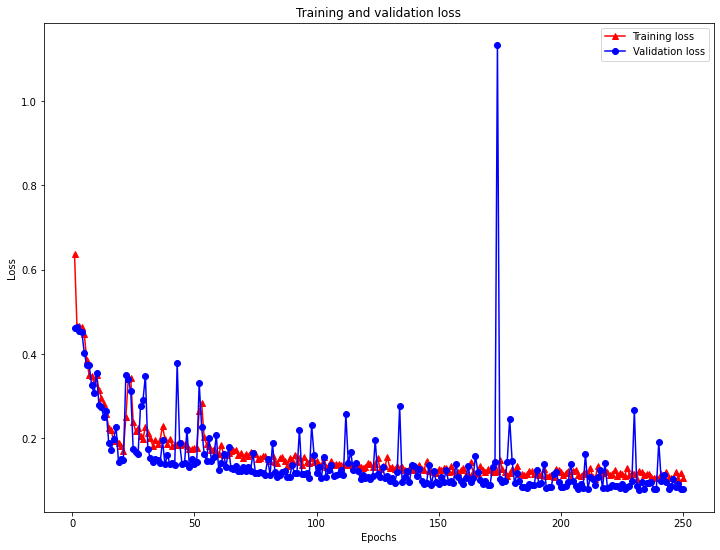

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "-r^" is for solid red line with triangle markers.
plt.plot(epochs, loss, '-r^', label='Erro do Treinamento')
# "-b0" is for solid blue line with circle markers.
plt.plot(epochs, val_loss, '-bo', label='Validação do erro')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

17 - Acurácia

In [ ]:
test_loss, test_acc = model.evaluate(x_teste_norm,  y_teste, verbose=2)

print('\nAcurácia: {:.4f}%'.format(test_acc * 100))


96/96 - 0s - loss: 0.0805 - accuracy: 0.9721

Acurácia: 97.2076%


18 - Mostrando as saídas da rede

In [ ]:
predict_class2 = np.argmax(model.predict(x_teste_norm), axis=-1)

In [ ]:
for i in predict_class2:
  print(i)

1
1
0
1
0
0
0
0
0
1
0
2
2
1
0
0
2
0
2
1
2
2
1
2
0
1
2
0
1
1
1
0
0
0
1
2
2
0
1
1
2
1
0
0
2
2
0
0
2
0
2
2
1
2
0
0
1
0
0
1
0
2
2
1
0
0
1
0
2
1
0
1
2
2
1
2
2
0
2
0
0
1
0
2
2
0
0
2
0
0
2
2
0
0
2
1
0
2
2
2
2
2
0
2
1
2
0
1
0
0
2
0
0
0
0
0
1
0
1
2
0
1
2
2
0
1
1
1
2
0
0
0
0
0
1
2
1
1
2
2
2
2
0
2
0
0
1
2
1
1
0
1
1
0
1
0
1
1
0
2
1
2
2
0
2
1
2
2
0
2
1
1
0
1
2
2
1
1
1
0
0
0
2
0
2
2
2
1
2
1
0
1
0
0
0
1
2
1
1
2
0
0
1
2
0
2
2
2
0
0
1
0
0
0
2
2
0
1
0
2
0
2
1
0
1
2
1
2
0
2
0
0
0
2
0
2
0
0
0
0
1
1
0
2
1
2
0
1
1
1
0
2
1
0
2
2
0
2
2
0
0
2
2
1
1
0
2
2
2
2
0
2
2
0
1
2
1
2
2
0
1
2
2
1
1
0
1
2
0
0
1
0
0
2
1
0
1
2
0
2
1
1
0
2
2
2
1
1
0
0
2
1
0
2
2
1
1
1
2
2
2
2
0
1
1
2
0
0
2
2
2
1
2
0
1
1
0
2
1
1
2
2
0
1
1
2
1
1
0
0
0
0
1
2
2
1
1
0
0
0
0
2
0
1
1
2
2
2
0
1
1
2
2
2
1
1
1
0
1
1
0
0
2
2
1
1
2
2
2
0
0
1
1
1
1
0
0
2
1
2
1
2
1
2
0
2
1
2
1
0
0
1
1
2
2
0
2
2
1
0
2
0
0
0
2
0
0
2
1
1
1
0
0
0
0
0
1
1
2
1
1
0
0
0
1
0
0
0
1
2
0
0
1
0
1
0
0
0
2
2
2
2
1
1
0
0
0
2
2
2
0
0
1
0
2
2
0
1
0
1
2
0
0
0
0
0
2
0
0
0
1
2
0
1
0
2
1
2
0
2


19 - Matriz de Confusão

In [ ]:
cm = confusion_matrix(y_teste, predict_class2)
cm

array([[1026,   11,    0],
       [  73,  898,    0],
       [   1,    0, 1035]])

20 - Classificação dos scores

In [ ]:
print(classification_report(y_teste, predict_class2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1037
           1       0.99      0.92      0.96       971
           2       1.00      1.00      1.00      1036

    accuracy                           0.97      3044
   macro avg       0.97      0.97      0.97      3044
weighted avg       0.97      0.97      0.97      3044



21 - Colocando as saídas preditas em uma lista

In [ ]:
pred_teste_list = list(predict_class2)
len(pred_teste_list)

3044

22 - Inserção da coluna das classes preditas no DataFrame de testes para comparação

In [ ]:
dados_teste['Valor_Predição'] = pred_teste_list
dados_teste.head(30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,u_mag,g_mag,r_mag,i_mag,z_mag,classe,Valor_Predição
10168,18.98,19046.0,19409.00,19668.00,19807.0,WhiteDwarf,1
5565,20648.00,20199.0,20314.00,20478.00,22811.0,WhiteDwarf,1
3872,20453.00,20325.0,20209.00,19952.00,20012.0,Quasar,0
7849,19134.00,19541.0,19982.00,20391.00,20646.0,WhiteDwarf,1
6045,20038.00,19605.0,19501.00,19469.00,19582.0,WhiteDwarf,0
3695,20028.00,19970.0,19763.00,19530.00,19688.0,Quasar,0
2926,21205.00,20693.0,20195.00,20001.00,19870.0,Quasar,0
4949,21234.00,20913.0,20927.00,20585.00,20106.0,Quasar,0
3431,20687.00,20446.0,20331.00,20187.00,19942.0,Quasar,0
6838,20216.00,19774.0,20.05,20.29,20499.0,WhiteDwarf,1


In [ ]:
troca2 = {
     0 : 'Quasar',
     1 : 'WhiteDwarf',
     2 : 'RedGiant_MainSequence'
    
}
dados_teste['classe'] = dados_teste.classe.map(troca2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
troca3 = {
     0 : 'Quasar',
     1 : 'WhiteDwarf',
     2 : 'RedGiant_MainSequence'
    
}
dados_teste['Valor_Predição'] = dados_teste.Valor_Predição.map(troca3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
dados_teste.head(30)

,u_mag,g_mag,r_mag,i_mag,z_mag,classe,Valor_Predição
10168,18.98,19046.0,19409.00,19668.00,19807.0,WhiteDwarf,WhiteDwarf
5565,20648.00,20199.0,20314.00,20478.00,22811.0,WhiteDwarf,WhiteDwarf
3872,20453.00,20325.0,20209.00,19952.00,20012.0,Quasar,Quasar
7849,19134.00,19541.0,19982.00,20391.00,20646.0,WhiteDwarf,WhiteDwarf
6045,20038.00,19605.0,19501.00,19469.00,19582.0,WhiteDwarf,Quasar
3695,20028.00,19970.0,19763.00,19530.00,19688.0,Quasar,Quasar
2926,21205.00,20693.0,20195.00,20001.00,19870.0,Quasar,Quasar
4949,21234.00,20913.0,20927.00,20585.00,20106.0,Quasar,Quasar
3431,20687.00,20446.0,20331.00,20187.00,19942.0,Quasar,Quasar
6838,20216.00,19774.0,20.05,20.29,20499.0,WhiteDwarf,WhiteDwarf


23 - Importação do conjunto de dados para testar a rede

In [ ]:
dataset6 = pd.read_excel('/content/drive/My Drive//TrabalhoFinal_ICAP2020/SDSS_test2.xlsx')

24 - Exclusão de colunas desnecessárias

In [ ]:
dataset6 = dataset6.drop(['ra','dec'], axis=1)

25 - Filtrando o número de linhas iguais aos dados de treinamento

In [ ]:
dataset6 = dataset6.loc[0:11999]
dataset6

,u_mag,g_mag,r_mag,i_mag,z_mag
0,19388308.0,17056925.0,16096813.0,15746082.0,15560712.0
1,17983265.0,17071049.0,16763483.0,16655209.0,16600836.0
2,19171825.0,1800613.0,17593836.0,17435181.0,17363775.0
3,20736958.0,18583487.0,17643984.0,17305689.0,17137621.0
4,20706478.0,19746189.0,1934816.0,19217245.0,19166542.0
...,...,...,...,...,...
11995,19556221.0,18372477.0,17864784.0,17669708.0,1754652.0
11996,18240902.0,16587601.0,15983128.0,15785189.0,15667263.0
11997,17769135.0,16782995.0,16458067.0,16354757.0,16292578.0
11998,20324854.0,17855936.0,16796333.0,16407116.0,16074814.0


26 - Normalização dos Dados

In [ ]:
scaler = StandardScaler()
scaler.fit(dataset6)
dataset6_norm = scaler.transform(dataset6)


28 - Predição da rede treinada

In [ ]:
predict2 = model.predict(dataset6_norm)

29 - Gerar sa saídas preditas

In [ ]:
predict_class3 = np.argmax(model.predict(dataset6_norm), axis=-1)

30 - Mostrar as saídas preditas

In [ ]:
for i in predict_class3:
  print(i)

A saída de streaming foi truncada nas últimas 5000 linhas.
1
1
2
2
1
2
2
1
2
2
1
2
2
2
2
2
2
1
2
1
2
2
2
2
0
2
2
2
2
1
2
1
2
2
2
2
2
2
1
2
2
1
2
2
1
2
2
1
2
2
2
2
2
1
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
1
1
2
1
1
2
1
2
1
2
2
2
2
2
1
2
1
1
2
2
2
2
2
1
2
2
2
2
2
2
2
1
1
1
2
2
2
2
1
2
2
2
2
2
2
2
2
1
2
2
2
1
2
1
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
1
1
1
2
2
2
2
2
0
1
1
2
2
2
2
2
1
2
1
2
2
2
2
1
2
2
2
2
2
2
2
1
2
1
2
2
2
2
2
2
2
1
2
2
2
2
1
2
1
1
1
1
1
2
2
1
2
1
1
2
2
2
2
2
2
1
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
1
2
1
1
2
2
2
1
2
2
2
1
1
2
2
2
0
2
1
2
2
1
2
2
2
2
1
2
2
1
1
1
1
2
1
2
2
2
1
2
2
1
2
1
2
1
2
2
2
2
2
2
2
1
2
2
2
2
2
1
2
2
1
1
1
2
2
2
1
2
1
2
2
2
2
1
2
1
2
1
2
2
1
2
2
1
2
2
1
2
2
2
2
1
2
2
1
2
2
2
2
2
1
2
2
1
1
0
1
1
2
2
2
1
2
2
2
1
2
2
0
2
2
1
1
1
1
1
2
2
2
1
2
2
2
2
1
2
2
2
2
2
1
2
1
2
1
2
1
1
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
1
0
2
2
2
1
2
2
1
2
2
1
2
2
2
0
2
2
2
2
1
1
2
1
2
2
2
2
2
2
2
2
2
2
2
1
2
2
1
2
2
2
2
2
2
0
2
1
2
2
1
2
1
2
2
0
2
2
2
2
1
1
2
2
2
0
1

31 - Colocar as saídas em uma lista

In [ ]:
pred_teste_list2 = list(predict_class3)

32 - Inserção da coluna das classes preditas no DataFrame de testes para classificação

In [ ]:
dataset6['Class_Model'] = pred_teste_list2
dataset6.head(30)

,u_mag,g_mag,r_mag,i_mag,z_mag,Class_Model
0,19388308.0,17056925.0,16096813.0,15746082.0,15560712.0,2
1,17983265.0,17071049.0,16763483.0,16655209.0,16600836.0,2
2,19171825.0,1800613.0,17593836.0,17435181.0,17363775.0,1
3,20736958.0,18583487.0,17643984.0,17305689.0,17137621.0,2
4,20706478.0,19746189.0,1934816.0,19217245.0,19166542.0,2
5,19959368.0,18575682.0,18020813.0,17824652.0,17645559.0,2
6,1712776.0,1596772.0,15533534.0,15325152.0,15273359.0,1
7,19661592.0,17221388.0,16197056.0,1582595.0,15621091.0,1
8,19978476.0,19111538.0,18787729.0,18734694.0,18699121.0,2
9,19480234.0,18547823.0,18255615.0,1810714.0,18213093.0,2


In [ ]:
troca4 = {
     0 : 'Quasar',
     1 : 'WhiteDwarf',
     2 : 'RedGiant_MainSequence'
    
}
dataset6['Class_Model'] = dataset6.Class_Model.map(troca4)

In [ ]:
dataset6.head(30)

,u_mag,g_mag,r_mag,i_mag,z_mag,Class_Model
0,19388308.0,17056925.0,16096813.0,15746082.0,15560712.0,RedGiant_MainSequence
1,17983265.0,17071049.0,16763483.0,16655209.0,16600836.0,RedGiant_MainSequence
2,19171825.0,1800613.0,17593836.0,17435181.0,17363775.0,WhiteDwarf
3,20736958.0,18583487.0,17643984.0,17305689.0,17137621.0,RedGiant_MainSequence
4,20706478.0,19746189.0,1934816.0,19217245.0,19166542.0,RedGiant_MainSequence
5,19959368.0,18575682.0,18020813.0,17824652.0,17645559.0,RedGiant_MainSequence
6,1712776.0,1596772.0,15533534.0,15325152.0,15273359.0,WhiteDwarf
7,19661592.0,17221388.0,16197056.0,1582595.0,15621091.0,WhiteDwarf
8,19978476.0,19111538.0,18787729.0,18734694.0,18699121.0,RedGiant_MainSequence
9,19480234.0,18547823.0,18255615.0,1810714.0,18213093.0,RedGiant_MainSequence
